In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
article_df = pd.read_json("/content/drive/MyDrive/2차 프로젝트/recommandation_model/data/article.json")
article_df.info()
article_category_df = article_df[['id', 'category_id']]
article_category_df
article_category_df = article_category_df.rename(columns={'id': 'article_id'})
article_category_df

bookmark_df = pd.read_json("/content/drive/MyDrive/2차 프로젝트/recommandation_model/data/bookmark_abstract_table.json") # 전체 북마크

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5710 entries, 0 to 5709
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   5710 non-null   int64 
 1   title                5710 non-null   object
 2   content              5710 non-null   object
 3   abstract             5710 non-null   object
 4   content_url          5710 non-null   object
 5   category_id          5710 non-null   int64 
 6   article_public_Date  5710 non-null   object
dtypes: int64(2), object(5)
memory usage: 312.4+ KB


In [ ]:
bookmark_df = bookmark_df.merge(article_category_df, on='article_id', how='left')
user_df= pd.read_json("/content/drive/MyDrive/2차 프로젝트/recommandation_model/data/user.json")

해야 하는 거
- 전체 고객 중 북마크를 한번이라도 한 고객의 비율
- 전체 고객 중 별점을 한번이라도 한 고객의 비율
- n-component, max_df를 다르게 주면 결과도 다르게 나오는가
- 정규성 그래프 뽑고
- 전체 고객에 대한 EDA
- 별점 테이블에 대한 EDA
- top100, low 100등등 뽑아보고 지울지 말지 고민해야함
- article_df로 토픽모델링한 거랑, book_df로 토픽모델링한거랑, ratings로 토픽모델링한 게 전부다 정규분포나 형태가 다름. 각각 다뽑아봐야함


# 기본 데이터 EDA

### article

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

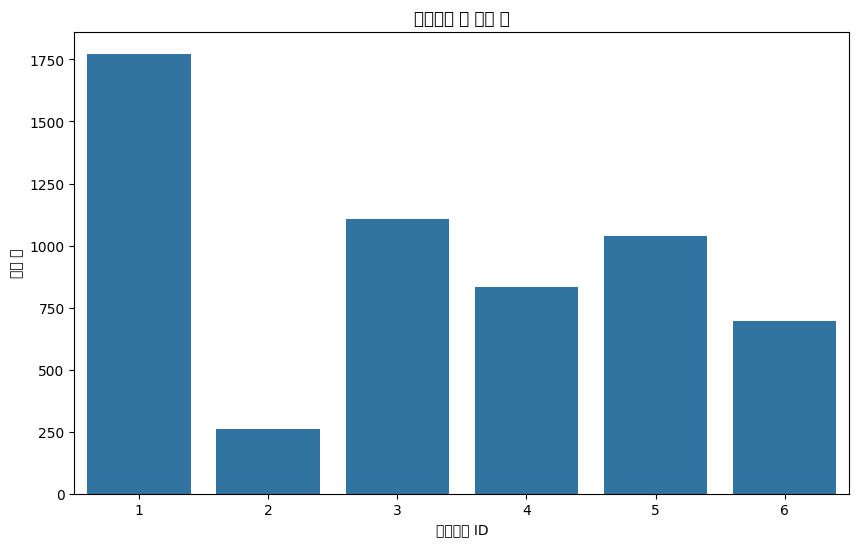

In [ ]:
# 전체 기사(5700개 정도)의 카테고리별 분포

# 카테고리 별로 카운트
category_counts = article_df['category_id'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('카테고리 별 기사 수')
plt.xlabel('카테고리 ID')
plt.ylabel('문서 수')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

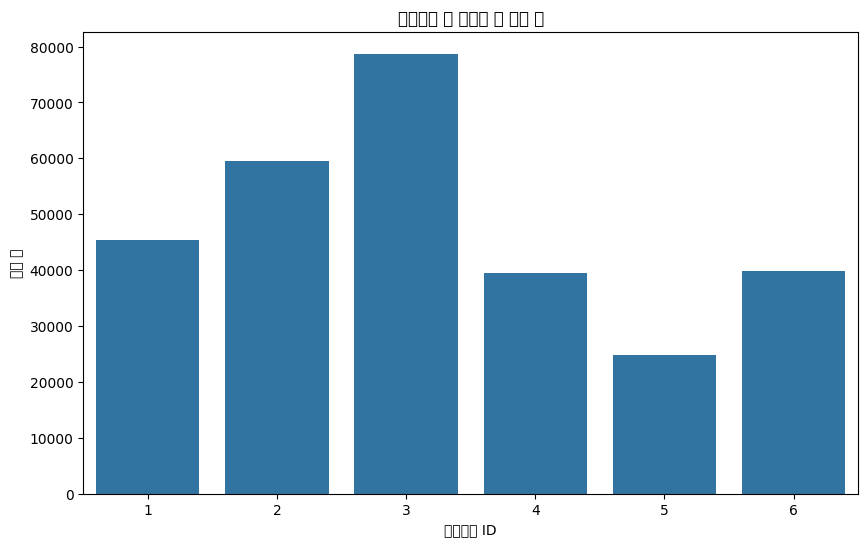

In [ ]:
# 북마크 준 기사들 카테고리 별로 카운트
category_counts = bookmark_df['category_id'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('카테고리 별 북마크 된 기사 수')
plt.xlabel('카테고리 ID')
plt.ylabel('문서 수')
plt.show()

### user

1. 지역별 분포

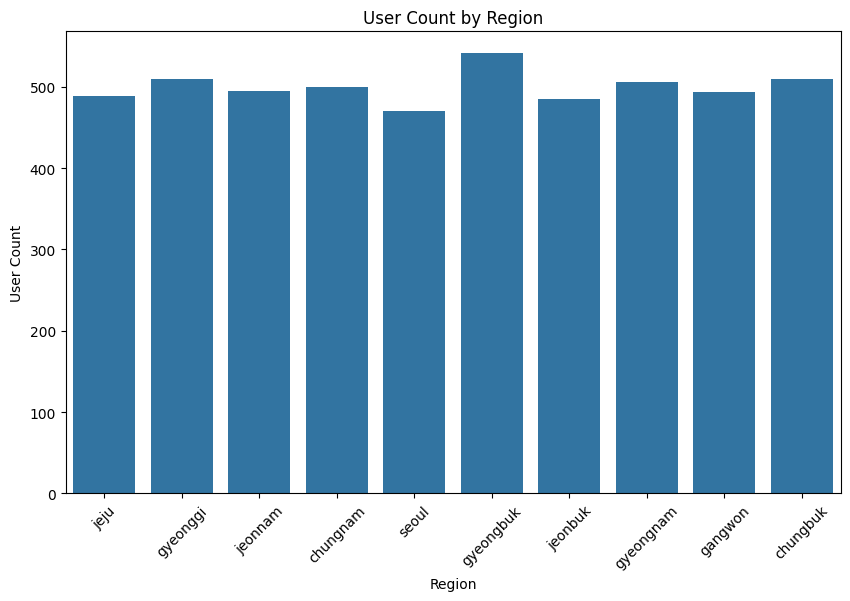

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=user_df, x='user_region')
plt.title('User Count by Region')
plt.xlabel('Region')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.show()

2. 성별

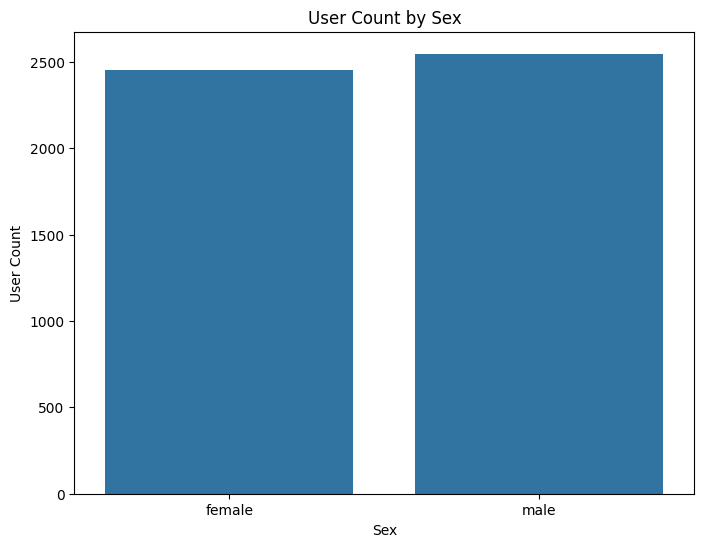

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=user_df, x='user_sex')
plt.title('User Count by Sex')
plt.xlabel('Sex')
plt.ylabel('User Count')
plt.show()

3. 직업별

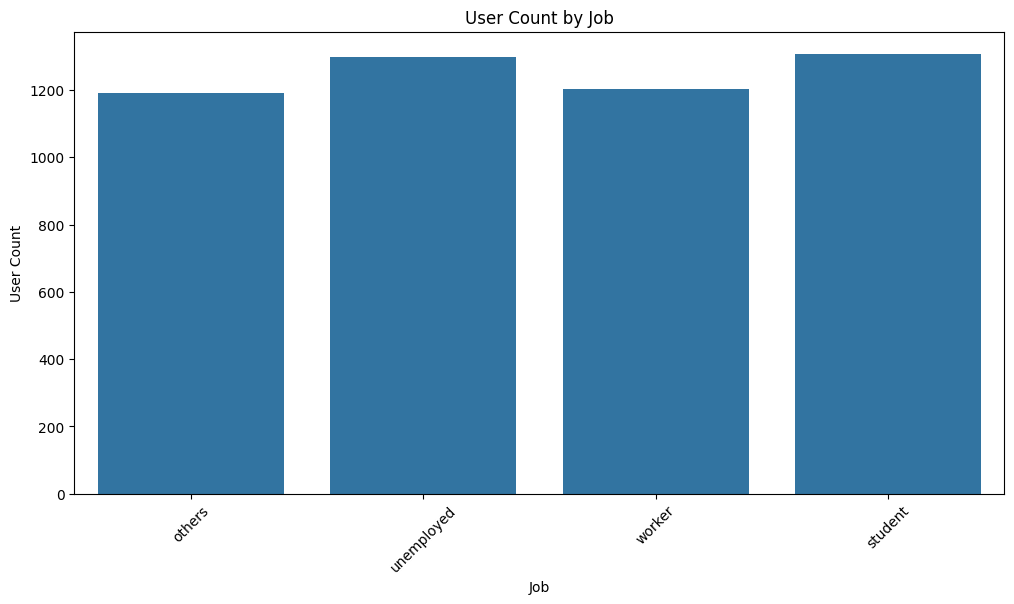

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=user_df, x='user_job')
plt.title('User Count by Job')
plt.xlabel('Job')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.show()

4. 목적별

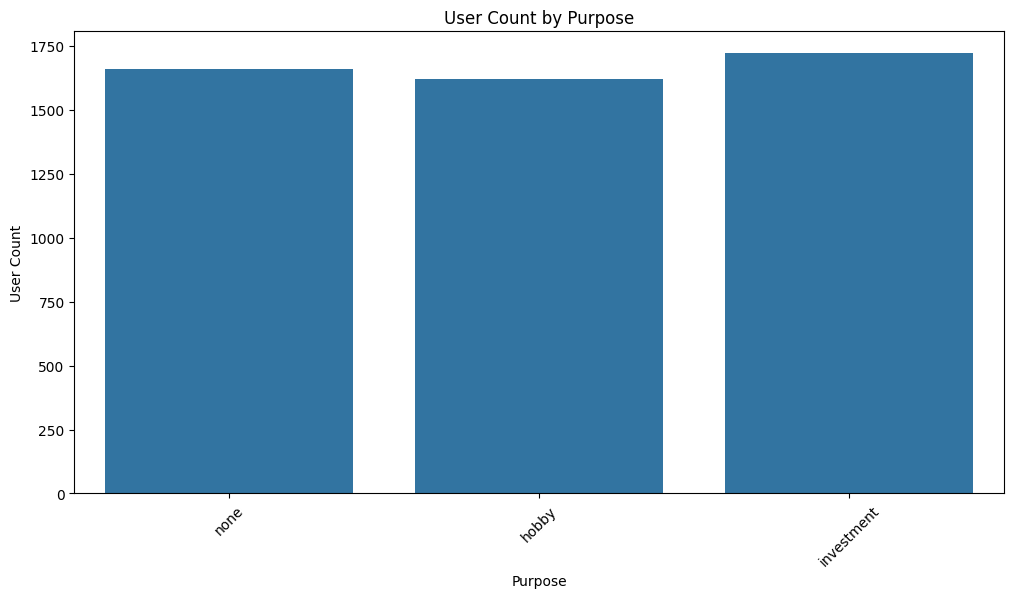

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=user_df, x='user_purpose')
plt.title('User Count by Purpose')
plt.xlabel('Purpose')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.show()

# 토픽 분포

## 전체 기사 대상 토픽

In [ ]:
article_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5710 entries, 0 to 5709
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   5710 non-null   int64 
 1   title                5710 non-null   object
 2   content              5710 non-null   object
 3   abstract             5710 non-null   object
 4   content_url          5710 non-null   object
 5   category_id          5710 non-null   int64 
 6   article_public_Date  5710 non-null   object
dtypes: int64(2), object(5)
memory usage: 312.4+ KB


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# WordNetLemmatizer 객체 생성
lemmatizer = WordNetLemmatizer()

# 사용자 별로 토픽 모델링, 표제어 추출
def extract_keywords(text):
    # TF 벡터화
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', token_pattern=r'\b[^\d\W_]{3,}\b')
    tf = vectorizer.fit_transform(text)

    # LDA 모델링
    lda_model = LatentDirichletAllocation(n_components=3, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
    lda_model.fit(tf)

    # 토큰화된 단어들을 표제어로 변환하고 중복을 제거하여 반환
    feature_names = vectorizer.get_feature_names_out()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in feature_names]
    unique_lemmatized_words = set(lemmatized_words)

    return ','.join(unique_lemmatized_words)

# # 사용자 별 토픽 모델링 및 표제어 추출
keywords = article_df.groupby('category_id')['content'].apply(extract_keywords).reset_index()
keywords.columns = ['id', 'keywords']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
keywords.head(15)

,id,keywords
0,1,"smirnov,respectable,lasted,racing,bailout,peni..."
1,2,"claimed,politics,arturo,hole,obsessed,lasted,m..."
2,3,"claimed,outflow,leach,wessex,politics,forex,ho..."
3,4,"claimed,outflow,leach,wessex,gull,politics,res..."
4,5,"claimed,apostolic,leach,politics,respectable,u..."
5,6,"claimed,tethered,gull,politics,respectable,unt..."


In [ ]:
# 중복되지 않은 단어 수 계산
unique_word_count = len(set(','.join(keywords['keywords']).split(',')))
print("Total number of unique words in 'keywords' column:", unique_word_count)

Total number of unique words in 'keywords' column: 36241


In [ ]:
def visualize_topic_distribution(keywords):
    topics = [keywords.split(',') for keywords in keywords['keywords']] # 토픽 목록을 쉼표로 분리하여 리스트로 만
    topics_flat = [topic for sublist in topics for topic in sublist] # 중첩된 리스트를 펼쳐서 모든 토픽을 하나의 리스트로
    topic_counts = pd.Series(topics_flat).value_counts()

    # KDE : 토픽 수의 분포 보여줌, 히스토그램을 부드러운 곡선으로 근사화한 것
    plt.figure(figsize=(8, 6))
    sns.kdeplot(topic_counts, color='blue', linewidth=3)
    plt.title('Topic Count Distribution')
    plt.xlabel('Count')
    plt.ylabel('Density')

    plt.show()

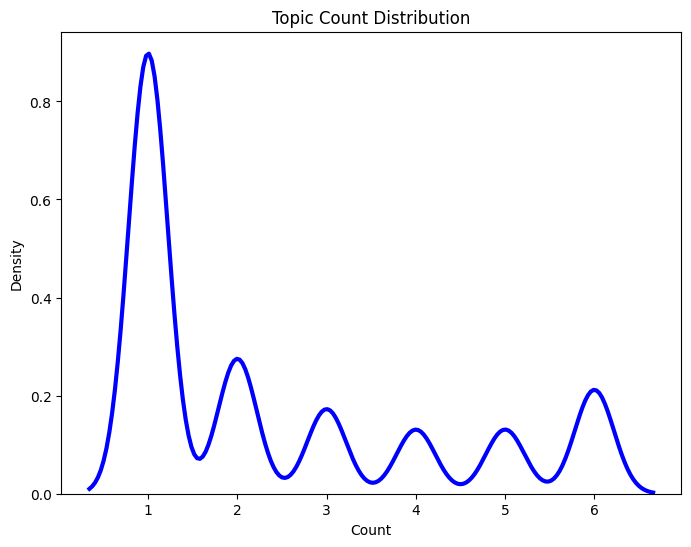

In [ ]:
visualize_topic_distribution(keywords)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def visualize_topic_distribution(user_keywords):
    # 단어마다 쪼개가지고 세기
    topics = [keywords.split(',') for keywords in user_keywords['keywords']]
    topics_flat = [topic for sublist in topics for topic in sublist]
    topic_counts = pd.Series(topics_flat).value_counts()

    # 정규분포
    plt.subplot(1, 3, 2)
    sns.histplot(topic_counts, kde=True, color='skyblue', bins=20)
    plt.title('Topic Count Distribution')
    plt.xlabel('Count')
    plt.ylabel('Frequency')

    # QQ # 데이터의 정규성을 시각적으로 평가. 데이터의 분포가 정규 분포에 얼마나 가까운지? 산점도는 대각선에 가깝게 나타날 수록 정규분포에 가까움
    plt.subplot(1, 3, 3)
    sorted_counts = np.sort(topic_counts)
    norm = np.random.normal(0, 1, len(sorted_counts))
    plt.plot(norm, sorted_counts, 'o', color='coral')
    plt.title('Normal Q-Q Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')

    plt.tight_layout()
    plt.show()

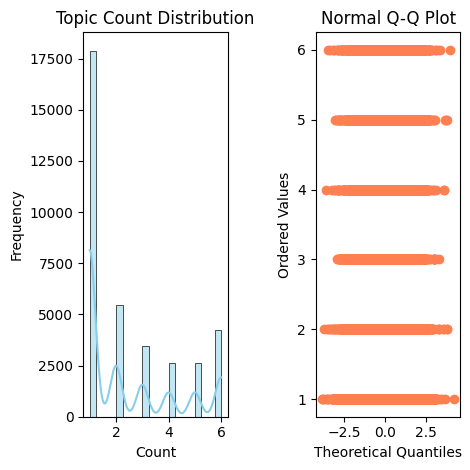

In [ ]:
visualize_topic_distribution(keywords)

# 북마크 df 사용

In [ ]:
# 사용자 별로 토픽 모델링, 표제어 추출
def extract_keywords(text):
    # TF 벡터화
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', token_pattern=r'\b[^\d\W_]{3,}\b')
    tf = vectorizer.fit_transform(text)

    # LDA 모델링
    lda_model = LatentDirichletAllocation(n_components=3, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
    lda_model.fit(tf)

    # 토큰화된 단어들을 표제어로 변환하고 중복을 제거하여 반환
    feature_names = vectorizer.get_feature_names_out()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in feature_names]
    unique_lemmatized_words = set(lemmatized_words)

    return ','.join(unique_lemmatized_words)

# 사용자 별 토픽 모델링 및 표제어 추출
user_keywords = bookmark_df.groupby('user_id')['abstract'].apply(extract_keywords).reset_index()
user_keywords.columns = ['user_id', 'keywords']

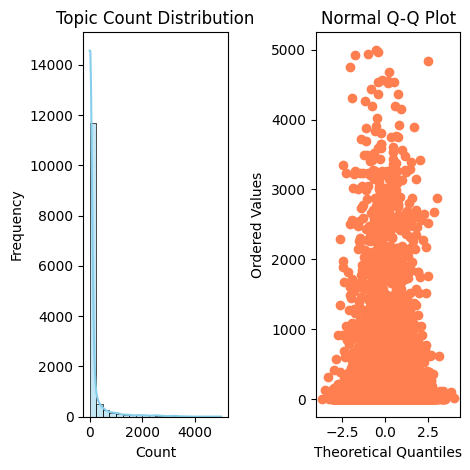


Most Common Topics:
keywords
year      4997
said      4972
time      4935
new       4916
world     4835
people    4757
week      4676
say       4571
just      4556
like      4543
Name: count, dtype: int64

User-Topic Distribution:
      user_id                                           keywords
0           2  time,wednesday,coaching,coach,lead,head,make,s...
1           3  pre,try,lead,hour,racing,trainer,match,point,r...
2           4  pre,stage,ultimate,nation,season,way,man,decis...
3           5  gold,football,close,added,match,point,school,r...
4           6  try,couple,time,friday,regulatory,beauty,secon...
...       ...                                                ...
4995     4997  claimed,stage,planet,quiet,working,curious,buy...
4996     4998  planet,wednesday,colleague,protest,surface,wor...
4997     4999  pre,project,called,push,working,friendly,allow...
4998     5000  wednesday,surface,working,ahead,gaza,stopped,u...
4999     5001  claimed,stage,wednesday,working,type,v

In [ ]:
def topic_modeling_eda(user_keywords):

    visualize_topic_distribution(user_keywords)

    most_common_topics = user_keywords['keywords'].str.split(',').explode().value_counts().head(10)
    print("\nMost Common Topics:")
    print(most_common_topics)


    print("\nUser-Topic Distribution:")
    print(user_keywords)

topic_modeling_eda(user_keywords)

## 파라미터

### max_df

- 0.4 일 때

In [ ]:
def user_topics(text):
  count = CountVectorizer(stop_words = "english", max_df=0.4, token_pattern=r'\b[^\d\W_]{3,}\b')
  count_vectored = count.fit_transform(text)

  feature_names = count.get_feature_names_out()

  lda = LatentDirichletAllocation(n_components=6, random_state=11, learning_method="batch")
  lda.fit(count_vectored)

  topics = []
  for topic_index, topic in enumerate(lda.components_):

    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[ :10]

    feature_concat = ','.join([feature_names[i] for i in top_indexes])
    topics.append(feature_concat)

  topics = ','.join(topics)
  return topics

def merge_df():
  user_keyword_df = bookmark_df.groupby("user_id")["abstract"].apply(user_topics).reset_index()
  user_keyword_df.columns = ["user_id", "keywords"]

  user_info_topics_df = user_df.merge(user_keyword_df, on="user_id")
  return user_info_topics_df

user_topics_df = merge_df()

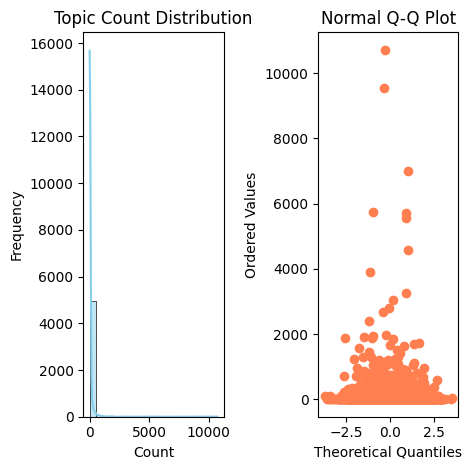


Most Common Topics:
keywords
said          10713
year           9537
new            7004
company        5736
government     5718
people         5561
years          4564
world          3892
time           3247
including      3049
Name: count, dtype: int64

User-Topic Distribution:
      user_age user_region user_sex    user_job user_purpose  user_id  \
0           14        jeju   female      others         none        2   
1           15    gyeonggi     male      others         none        3   
2           15     jeonnam   female  unemployed         none        4   
3           12    chungnam   female      worker        hobby        5   
4           16       seoul   female      others         none        6   
...        ...         ...      ...         ...          ...      ...   
4995        54     jeonbuk     male      worker   investment     4997   
4996        58    gyeonggi     male  unemployed         none     4998   
4997        51       seoul     male     student   investment 

In [ ]:
def topic_modeling_eda(user_keywords):
    # Visualize topic distribution
    visualize_topic_distribution(user_keywords)

    # Display most common topics
    most_common_topics = user_keywords['keywords'].str.split(',').explode().value_counts().head(10)
    print("\nMost Common Topics:")
    print(most_common_topics)

    # Explore relationship between users and topics
    print("\nUser-Topic Distribution:")
    print(user_keywords)

topic_modeling_eda(user_topics_df)

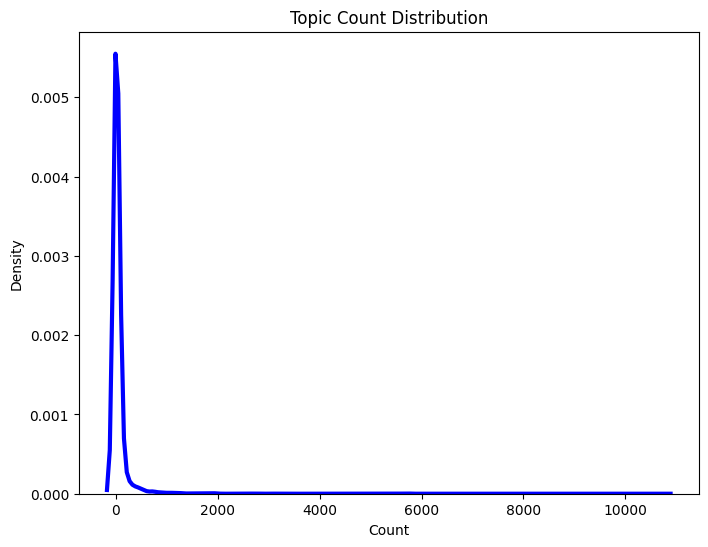

In [ ]:
def visualize_topic_distribution(user_keywords):
    topics = [keywords.split(',') for keywords in user_keywords['keywords']] # 토픽 목록을 쉼표로 분리하여 리스트로 만
    topics_flat = [topic for sublist in topics for topic in sublist] # 중첩된 리스트를 펼쳐서 모든 토픽을 하나의 리스트로
    topic_counts = pd.Series(topics_flat).value_counts()

    # KDE : 토픽 수의 분포 보여줌, 히스토그램을 부드러운 곡선으로 근사화한 것
    plt.figure(figsize=(8, 6))
    sns.kdeplot(topic_counts, color='blue', linewidth=3)
    plt.title('Topic Count Distribution')
    plt.xlabel('Count')
    plt.ylabel('Density')

    plt.show()

visualize_topic_distribution(user_topics_df)

- 0.6 일 때

In [ ]:
def user_topics(text):
  count = CountVectorizer(stop_words = "english", max_df=0.6, token_pattern=r'\b[^\d\W_]{3,}\b')
  count_vectored = count.fit_transform(text)

  feature_names = count.get_feature_names_out()

  lda = LatentDirichletAllocation(n_components=6, random_state=11, learning_method="batch")
  lda.fit(count_vectored)

  topics = []
  for topic_index, topic in enumerate(lda.components_):

    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[ :10]

    feature_concat = ','.join([feature_names[i] for i in top_indexes])
    topics.append(feature_concat)

  topics = ','.join(topics)
  return topics

def merge_df():
  user_keyword_df = bookmark_df.groupby("user_id")["abstract"].apply(user_topics).reset_index()
  user_keyword_df.columns = ["user_id", "keywords"]

  user_info_topics_df = user_df.merge(user_keyword_df, on="user_id")
  return user_info_topics_df

user_topics_df = merge_df()

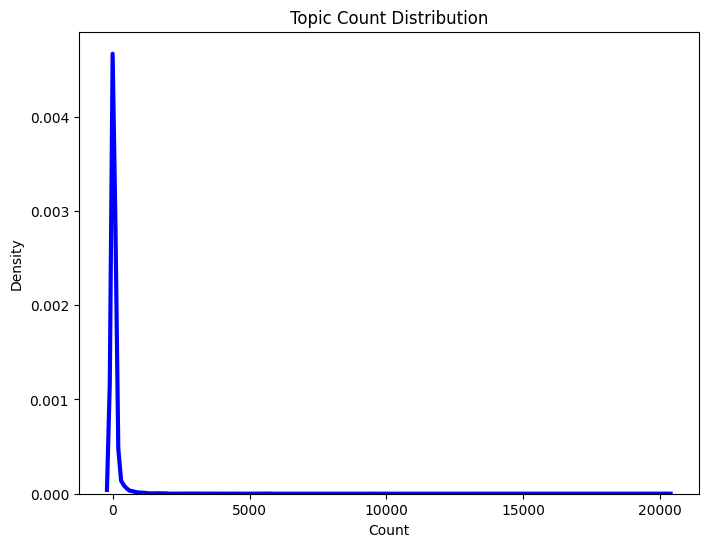


Most Common Topics:
keywords
said          20171
year           9454
new            6848
company        5670
government     5578
people         5415
years          4426
world          3777
time           3156
including      2944
Name: count, dtype: int64

User-Topic Distribution:
      user_age user_region user_sex    user_job user_purpose  user_id  \
0           14        jeju   female      others         none        2   
1           15    gyeonggi     male      others         none        3   
2           15     jeonnam   female  unemployed         none        4   
3           12    chungnam   female      worker        hobby        5   
4           16       seoul   female      others         none        6   
...        ...         ...      ...         ...          ...      ...   
4995        54     jeonbuk     male      worker   investment     4997   
4996        58    gyeonggi     male  unemployed         none     4998   
4997        51       seoul     male     student   investment 

In [ ]:
def topic_modeling_eda(user_keywords):
    # Visualize topic distribution
    visualize_topic_distribution(user_keywords)

    # Display most common topics
    most_common_topics = user_keywords['keywords'].str.split(',').explode().value_counts().head(10)
    print("\nMost Common Topics:")
    print(most_common_topics)

    # Explore relationship between users and topics
    print("\nUser-Topic Distribution:")
    print(user_keywords)

topic_modeling_eda(user_topics_df)

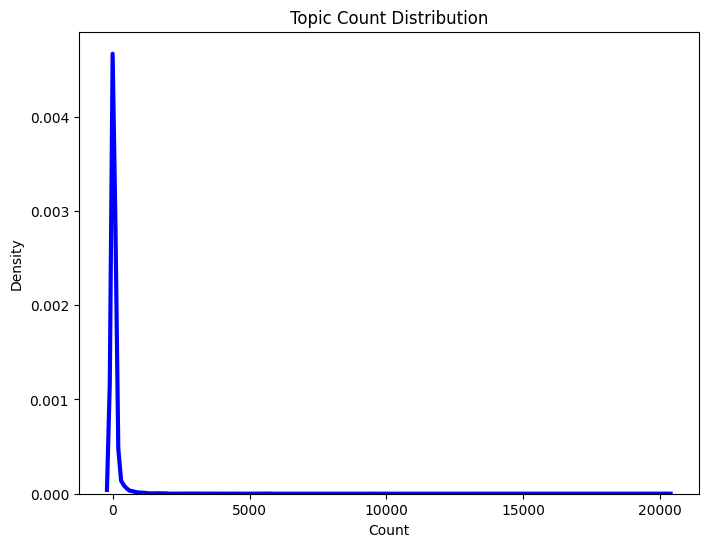

In [ ]:
def visualize_topic_distribution(user_keywords):
    topics = [keywords.split(',') for keywords in user_keywords['keywords']] # 토픽 목록을 쉼표로 분리하여 리스트로 만
    topics_flat = [topic for sublist in topics for topic in sublist] # 중첩된 리스트를 펼쳐서 모든 토픽을 하나의 리스트로
    topic_counts = pd.Series(topics_flat).value_counts()

    # KDE : 토픽 수의 분포 보여줌, 히스토그램을 부드러운 곡선으로 근사화한 것
    plt.figure(figsize=(8, 6))
    sns.kdeplot(topic_counts, color='blue', linewidth=3)
    plt.title('Topic Count Distribution')
    plt.xlabel('Count')
    plt.ylabel('Density')

    plt.show()

visualize_topic_distribution(user_topics_df)

- 0.8 분포

In [ ]:
def user_topics(text):
  count = CountVectorizer(stop_words = "english", max_df=0.8, token_pattern=r'\b[^\d\W_]{3,}\b')
  count_vectored = count.fit_transform(text)

  feature_names = count.get_feature_names_out()

  lda = LatentDirichletAllocation(n_components=6, random_state=11, learning_method="batch")
  lda.fit(count_vectored)

  topics = []
  for topic_index, topic in enumerate(lda.components_):

    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[ :10]

    feature_concat = ','.join([feature_names[i] for i in top_indexes])
    topics.append(feature_concat)

  topics = ','.join(topics)
  return topics

def merge_df():
  user_keyword_df = bookmark_df.groupby("user_id")["abstract"].apply(user_topics).reset_index()
  user_keyword_df.columns = ["user_id", "keywords"]

  user_info_topics_df = user_df.merge(user_keyword_df, on="user_id")
  return user_info_topics_df

user_topics_df = merge_df()

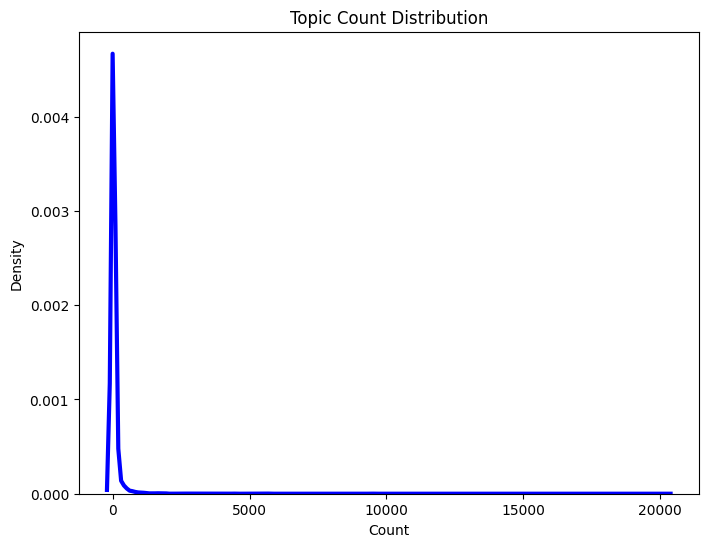


Most Common Topics:
keywords
said          20177
year           9453
new            6847
company        5671
government     5578
people         5414
years          4426
world          3776
time           3155
including      2944
Name: count, dtype: int64

User-Topic Distribution:
      user_age user_region user_sex    user_job user_purpose  user_id  \
0           14        jeju   female      others         none        2   
1           15    gyeonggi     male      others         none        3   
2           15     jeonnam   female  unemployed         none        4   
3           12    chungnam   female      worker        hobby        5   
4           16       seoul   female      others         none        6   
...        ...         ...      ...         ...          ...      ...   
4995        54     jeonbuk     male      worker   investment     4997   
4996        58    gyeonggi     male  unemployed         none     4998   
4997        51       seoul     male     student   investment 

In [ ]:
def topic_modeling_eda(user_keywords):

    visualize_topic_distribution(user_keywords)

    most_common_topics = user_keywords['keywords'].str.split(',').explode().value_counts().head(10)
    print("\nMost Common Topics:")
    print(most_common_topics)

    # Explore relationship between users and topics
    print("\nUser-Topic Distribution:")
    print(user_keywords)

topic_modeling_eda(user_topics_df)

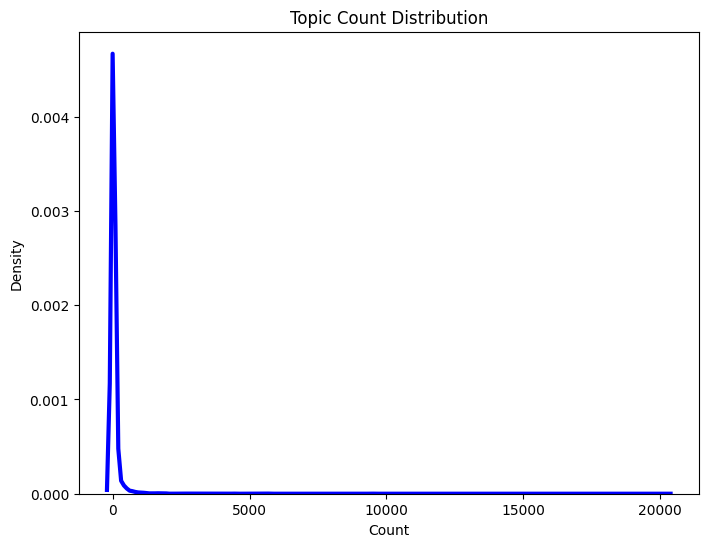

In [ ]:
def visualize_topic_distribution(user_keywords):
    topics = [keywords.split(',') for keywords in user_keywords['keywords']] # 토픽 목록을 쉼표로 분리하여 리스트로 만
    topics_flat = [topic for sublist in topics for topic in sublist] # 중첩된 리스트를 펼쳐서 모든 토픽을 하나의 리스트로
    topic_counts = pd.Series(topics_flat).value_counts()

    # KDE : 토픽 수의 분포 보여줌, 히스토그램을 부드러운 곡선으로 근사화한 것
    plt.figure(figsize=(8, 6))
    sns.kdeplot(topic_counts, color='blue', linewidth=3)
    plt.title('Topic Count Distribution')
    plt.xlabel('Count')
    plt.ylabel('Density')

    plt.show()

visualize_topic_distribution(user_topics_df)

- 0.95

In [ ]:
def user_topics(text):
  count = CountVectorizer(stop_words = "english", max_df=0.95, token_pattern=r'\b[^\d\W_]{3,}\b')
  count_vectored = count.fit_transform(text)

  feature_names = count.get_feature_names_out()

  lda = LatentDirichletAllocation(n_components=6, random_state=11, learning_method="batch")
  lda.fit(count_vectored)

  topics = []
  for topic_index, topic in enumerate(lda.components_):

    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[ :10]

    feature_concat = ','.join([feature_names[i] for i in top_indexes])
    topics.append(feature_concat)

  topics = ','.join(topics)
  return topics

def merge_df():
  user_keyword_df = bookmark_df.groupby("user_id")["abstract"].apply(user_topics).reset_index()
  user_keyword_df.columns = ["user_id", "keywords"]

  user_info_topics_df = user_df.merge(user_keyword_df, on="user_id")
  return user_info_topics_df

user_topics_df = merge_df()

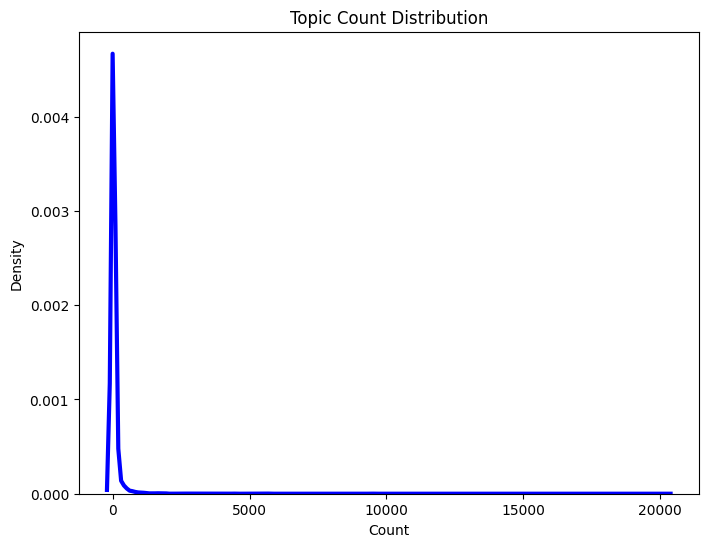


Most Common Topics:
keywords
said          20177
year           9453
new            6847
company        5671
government     5578
people         5414
years          4426
world          3776
time           3155
including      2944
Name: count, dtype: int64

User-Topic Distribution:
      user_age user_region user_sex    user_job user_purpose  user_id  \
0           14        jeju   female      others         none        2   
1           15    gyeonggi     male      others         none        3   
2           15     jeonnam   female  unemployed         none        4   
3           12    chungnam   female      worker        hobby        5   
4           16       seoul   female      others         none        6   
...        ...         ...      ...         ...          ...      ...   
4995        54     jeonbuk     male      worker   investment     4997   
4996        58    gyeonggi     male  unemployed         none     4998   
4997        51       seoul     male     student   investment 

In [ ]:
def topic_modeling_eda(user_keywords):
    # Visualize topic distribution
    visualize_topic_distribution(user_keywords)

    # Display most common topics
    most_common_topics = user_keywords['keywords'].str.split(',').explode().value_counts().head(10)
    print("\nMost Common Topics:")
    print(most_common_topics)

    # Explore relationship between users and topics
    print("\nUser-Topic Distribution:")
    print(user_keywords)

topic_modeling_eda(user_topics_df)

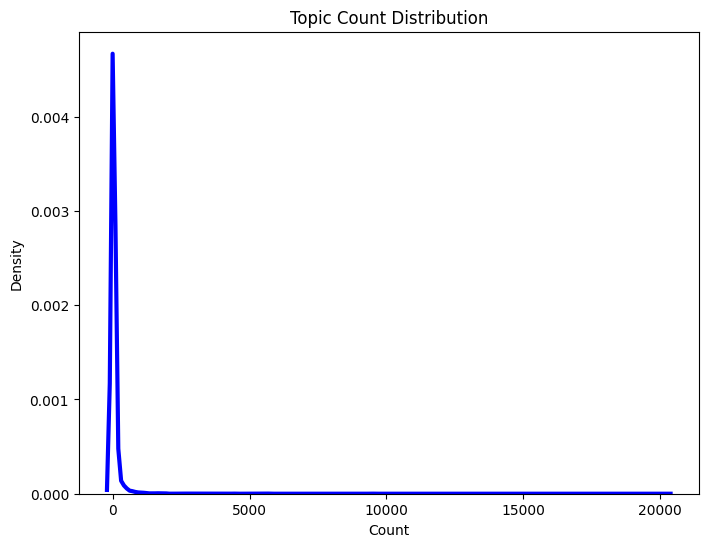

In [ ]:
def visualize_topic_distribution(user_keywords):
    topics = [keywords.split(',') for keywords in user_keywords['keywords']] # 토픽 목록을 쉼표로 분리하여 리스트로 만
    topics_flat = [topic for sublist in topics for topic in sublist] # 중첩된 리스트를 펼쳐서 모든 토픽을 하나의 리스트로
    topic_counts = pd.Series(topics_flat).value_counts()

    # KDE : 토픽 수의 분포 보여줌, 히스토그램을 부드러운 곡선으로 근사화한 것
    plt.figure(figsize=(8, 6))
    sns.kdeplot(topic_counts, color='blue', linewidth=3)
    plt.title('Topic Count Distribution')
    plt.xlabel('Count')
    plt.ylabel('Density')

    plt.show()

visualize_topic_distribution(user_topics_df)

### min_df

In [ ]:
def user_topics(text):
  count = CountVectorizer(stop_words = "english", max_df=0.95, token_pattern=r'\b[^\d\W_]{3,}\b')
  count_vectored = count.fit_transform(text)

  feature_names = count.get_feature_names_out()

  lda = LatentDirichletAllocation(n_components=6, random_state=11, learning_method="batch")
  lda.fit(count_vectored)

  topics = []
  for topic_index, topic in enumerate(lda.components_):

    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[ :10]

    feature_concat = ','.join([feature_names[i] for i in top_indexes])
    topics.append(feature_concat)

  topics = ','.join(topics)
  return topics

def merge_df():
  user_keyword_df = bookmark_df.groupby("user_id")["abstract"].apply(user_topics).reset_index()
  user_keyword_df.columns = ["user_id", "keywords"]

  user_info_topics_df = user_df.merge(user_keyword_df, on="user_id")
  return user_info_topics_df

user_topics_df = merge_df()

- min_df 1일때 삭제될 단어들

In [ ]:
def count_single_occurrence_keywords(user_keywords):
    # 모든 키워드 리스트를 하나의 리스트로 결합
    all_keywords = [keyword.split(',') for keyword in user_keywords['keywords']]
    all_keywords_flat = [word for sublist in all_keywords for word in sublist]

    # 각 단어의 등장 횟수를 세기
    word_counts = pd.Series(all_keywords_flat).value_counts()

    # 한 번만 등장하는 단어의 수 세기
    single_occurrence_keywords = word_counts[word_counts < 10]

    return len(single_occurrence_keywords), single_occurrence_keywords.index.tolist()

# 단어가 한 번만 등장하는 키워드 수와 리스트 추출
single_occurrence_count, single_occurrence_keywords = count_single_occurrence_keywords(user_topics_df)
print(f"Number of keywords appearing only once: {single_occurrence_count}")
print("Single occurrence keywords:", single_occurrence_keywords)

Number of keywords appearing only once: 3048
Single occurrence keywords: ['september', 'blast', 'katie', 'cheese', 'temporary', 'fares', 'luxury', 'message', 'danish', 'rare', 'trial', 'nayudu', 'believed', 'records', 'levelling', 'word', 'thurstan', 'stress', 'munich', 'colony', 'blockchain', 'taurus', 'aviation', 'ceremony', 'theguardian', 'protection', 'brutal', 'listen', 'graan', 'residents', 'bin', 'relevant', 'champs', 'aware', 'extremism', 'legs', 'goal', 'channel', 'allowing', 'rankings', 'cork', 'chatbots', 'branches', 'bearman', 'mirror', 'rustin', 'malaysian', 'drink', 'girls', 'benefits', 'measures', 'minute', 'rider', 'introduced', 'spinners', 'maritime', 'confirmed', 'arkle', 'governing', 'penalty', 'thought', 'injuries', 'ons', 'identity', 'contact', 'toronto', 'extremely', 'wework', 'fernández', 'type', 'mexico', 'palestine', 'burrow', 'debut', 'steals', 'pigeons', 'blacks', 'affected', 'brown', 'skills', 'callout', 'troubles', 'shishkin', 'stolen', 'picks', 'fighting',

- min_df 2 일때 삭제될 단어들

In [ ]:
def count_single_occurrence_keywords(user_keywords):
    # 모든 키워드 리스트를 하나의 리스트로 결합
    all_keywords = [keyword.split(',') for keyword in user_keywords['keywords']]
    all_keywords_flat = [word for sublist in all_keywords for word in sublist]

    # 각 단어의 등장 횟수를 세기
    word_counts = pd.Series(all_keywords_flat).value_counts()

    # 한 번만 등장하는 단어의 수 세기
    single_occurrence_keywords = word_counts[word_counts == 2]

    return len(single_occurrence_keywords), single_occurrence_keywords.index.tolist()

# 단어가 한 번만 등장하는 키워드 수와 리스트 추출
single_occurrence_count, single_occurrence_keywords = count_single_occurrence_keywords(user_topics_df)
print(f"Number of keywords appearing only once: {single_occurrence_count}")
print("Single occurrence keywords:", single_occurrence_keywords)

Number of keywords appearing only once: 562
Single occurrence keywords: ['mate', 'profitability', 'limit', 'profile', 'wye', 'riyadh', 'tower', 'fisher', 'upgradeable', 'lawrence', 'migrants', 'positive', 'racism', 'settlement', 'starfish', 'opponent', 'filled', 'dole', 'cassette', 'guyana', 'planes', 'conducted', 'shortfall', 'privet', 'scott', 'bone', 'dish', 'substack', 'wetlands', 'asian', 'whacker', 'nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn', 'looks', 'hotels', 'dyson', 'metro', 'grievance', 'stands', 'version', 'internal', 'weaker', 'transmission', 'amoc', 'clio', 'kaushik', 'cassino', 'grandmaster', 'ligament', 'pallesen', 'fix', 'neutral', 'monastery', 'hayek', 'album', 'inappropriate', 'sinner', 'visited', 'bosses', 'rebel', 'cpi', 'aren', 'unchecked', 'seasons', 'urgently', 'infant', 'joan', 'rajkot', 'convention', 'powerful', 'raptor', 'answering', 'struck', 'fingers', 'approval', 'kemp', 'producer', 'mcavoy', 'donation', 'remained', 'admitted', 'hyperloop', 'division', '

- min_df 3 일때 삭제될 단어들

In [ ]:
def count_single_occurrence_keywords(user_keywords):
    # 모든 키워드 리스트를 하나의 리스트로 결합
    all_keywords = [keyword.split(',') for keyword in user_keywords['keywords']]
    all_keywords_flat = [word for sublist in all_keywords for word in sublist]

    # 각 단어의 등장 횟수를 세기
    word_counts = pd.Series(all_keywords_flat).value_counts()

    # 한 번만 등장하는 단어의 수 세기
    single_occurrence_keywords = word_counts[word_counts == 3]

    return len(single_occurrence_keywords), single_occurrence_keywords.index.tolist()

# 단어가 한 번만 등장하는 키워드 수와 리스트 추출
single_occurrence_count, single_occurrence_keywords = count_single_occurrence_keywords(user_topics_df)
print(f"Number of keywords appearing only once: {single_occurrence_count}")
print("Single occurrence keywords:", single_occurrence_keywords)

Number of keywords appearing only once: 366
Single occurrence keywords: ['suit', 'bleus', 'spend', 'rory', 'moroni', 'dredging', 'tours', 'pensions', 'races', 'caroline', 'les', 'faso', 'gilt', 'redrow', 'cool', 'vast', 'jeremy', 'plus', 'golfers', 'usually', 'confederation', 'emslie', 'slogan', 'mid', 'commanders', 'mikhail', 'built', 'text', 'slowing', 'derby', 'provided', 'afghanistan', 'newspapers', 'romance', 'update', 'followers', 'campaigns', 'warehouse', 'norris', 'fanon', 'uci', 'commitment', 'brief', 'details', 'mugging', 'von', 'funded', 'fenwick', 'uber', 'edwards', 'expensive', 'maxwell', 'advantage', 'counselling', 'gdp', 'batting', 'entry', 'colour', 'depending', 'fbi', 'copyrighted', 'woodley', 'shohei', 'thatcher', 'passenger', 'tackling', 'breeding', 'escalation', 'sportsbook', 'footprint', 'computers', 'ultimately', 'rahm', 'attendance', 'cas', 'cremation', 'photograph', 'seek', 'stand', 'arrogance', 'domenicali', 'varuni', 'collapse', 'chanting', 'hacking', 'hedge',

### n-component

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

def compute_coherence_score(text, n_components):
    # TF 벡터화
    vectorizer = CountVectorizer(max_df=0.95, stop_words='english', token_pattern=r'\b[^\d\W_]{3,}\b')
    tf = vectorizer.fit_transform(text)

    # LDA 모델링
    lda_model = LatentDirichletAllocation(n_components=n_components, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
    lda_model.fit(tf)

    # 각 문서의 주제 확률 계산
    doc_topic_distribution = lda_model.transform(tf)

    # 각 주제의 단어 확률 계산
    topic_word_distribution = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]

    # coherence score 계산
    coherence_score = 0
    for i in range(len(topic_word_distribution)):
        similarity_matrix = cosine_similarity(topic_word_distribution[i].reshape(1, -1), doc_topic_distribution.dot(topic_word_distribution)[i].reshape(1, -1))
        coherence_score += similarity_matrix.mean()

    coherence_score /= len(topic_word_distribution)

    return coherence_score

# 각각의 토픽 수에 대한 coherence score 계산
n_components_list = [4, 5, 6]
for n_components in n_components_list:
    coherence_score = compute_coherence_score(user_keywords['keywords'], n_components)
    print(f"Coherence score for {n_components} topics: {coherence_score}")


Coherence score for 4 topics: 0.4888657983303917
Coherence score for 5 topics: 0.4147654757766045
Coherence score for 6 topics: 0.37668299357838925


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

def compute_coherence_score(text, n_components):
    # TF 벡터화
    vectorizer = CountVectorizer(max_df=0.95, stop_words='english', token_pattern=r'\b[^\d\W_]{3,}\b')
    tf = vectorizer.fit_transform(text)

    # LDA 모델링
    lda_model = LatentDirichletAllocation(n_components=n_components, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
    lda_model.fit(tf)

    # 각 문서의 주제 확률 계산
    doc_topic_distribution = lda_model.transform(tf)

    # 각 주제의 단어 확률 계산
    topic_word_distribution = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]

    # coherence score 계산
    coherence_score = 0
    for i in range(len(topic_word_distribution)):
        similarity_matrix = cosine_similarity(topic_word_distribution[i].reshape(1, -1), doc_topic_distribution.dot(topic_word_distribution)[i].reshape(1, -1))
        coherence_score += similarity_matrix.mean()

    coherence_score /= len(topic_word_distribution)

    return coherence_score

# 각각의 토픽 수에 대한 coherence score 계산
n_components_list = [1,2,3,4, 5, 6,7,8,9,10]
for n_components in n_components_list:
    coherence_score = compute_coherence_score(user_keywords['keywords'], n_components)
    print(f"Coherence score for {n_components} topics: {coherence_score}")

Coherence score for 1 topics: 1.0
Coherence score for 2 topics: 0.862626647020536
Coherence score for 3 topics: 0.6306115070910275
Coherence score for 4 topics: 0.4888657983303917
Coherence score for 5 topics: 0.4147654757766045
Coherence score for 6 topics: 0.37668299357838925
Coherence score for 7 topics: 0.3549744801311416
Coherence score for 8 topics: 0.3177675960395801
Coherence score for 9 topics: 0.34791647465896597
Coherence score for 10 topics: 0.2638872334640831


- coherence score는 주어진 토픽 수에 대한 모델의 일관성을 나타내는 지표라서 높은 coherence score는 토픽이 의미 있는 것으로 판단할 수 있음
- coherence score가 가장 높은 토픽 수가 최적의 토픽 수로 볼 수도?


- max_df 로 최대한 자른 후, min_df도 3까지는 유의미한 차이가 없어보임
- 정성평가 때 5~ 6 사이가 가장 토픽이 카테고리별로 비교적 균일하게 나온 모습을 보여서 5개 에서 6개 사이 픽스

## 유사도 점수 확인

In [ ]:
def lemmatize_token(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.lower().split()])

# 사용자 정의 함수를 포함한 함수 체인 구성
def preprocess(text):
    return lemmatize_token(text)

In [ ]:
def user_topics(text):
  count = CountVectorizer(stop_words="english", max_df = 0.8,  preprocessor=preprocess ,token_pattern=r'\b[^\d\W_]{3,}\b')
  count_vectored = count.fit_transform(text)

  feature_names = count.get_feature_names_out()

  lda = LatentDirichletAllocation(n_components=15, random_state=11, learning_method="batch")
  lda.fit(count_vectored)

  topics = []
  for topic_index, topic in enumerate(lda.components_):

    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[ :10]

    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    topics.append(feature_concat)

  topics = ','.join(topics)
  return topics

In [ ]:
def merge_df():
  user_keyword_df = bookmark_df.groupby("user_id")["abstract"].apply(user_topics).reset_index()
  user_keyword_df.columns = ["user_id", "keywords"]

  # merge
  user_info_topics_df = user_df.merge(user_keyword_df, on="user_id")

  # 원하는 컬럼만 추출
  user_info_topics_df = user_info_topics_df[["user_id","user_age","keywords"]]
  return user_info_topics_df

In [ ]:
user_topics_df = merge_df()

In [ ]:
# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(user_topics_df['keywords'].values)

In [ ]:
new_article_df = pd.read_json("/content/drive/MyDrive/2차 프로젝트/recommandation_model/data/new_data.json")

In [ ]:
def recommend_similar_articles(user_table, new_article_df, tfidf_vectorizer, tfidf_matrix):
    recommended_articles = []

    # TF-IDF 벡터화
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(user_table['keywords'].values.astype('U'))

    # 5명의 사용자(키워드)에 대해서 오늘 들어온 기사들과 유사도 기반 추천 기사 찾기
    for _, user_row in user_table.iterrows():
        user_tfidf = tfidf_vectorizer.transform([user_row['keywords']])  # 사용자의 관심사 TF-IDF 벡터

        # 새로운 기사들과의 유사도 계산
        similarities = cosine_similarity(user_tfidf, tfidf_vectorizer.transform(new_article_df['content']))

        # 유사도가 높은 순 추천
        similar_articles_indices = similarities.argsort()[0][::-1]
        recommended_articles_indices = similar_articles_indices[:5]  # 상위 5개 기사
        recommended_articles_df = new_article_df.iloc[recommended_articles_indices]

        recommended_articles.append(recommended_articles_df)

        # 사용자 정보 추가
        recommended_articles_df['user_id'] = user_row['user_id']
        recommended_articles_df['user_age'] = user_row['user_age']

    return recommended_articles

# 추천 기사
recommended_articles_dfs = recommended_articles = recommend_similar_articles(user_topics_df, new_article_df, tfidf_vectorizer, tfidf_matrix)
recommended_articles_combined = pd.concat(recommended_articles_dfs, ignore_index=True)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_articles_df['user_id'] = user_row['user_id']
<ipython-input-52-54ecb1d936c4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_articles_df['user_age'] = user_row['user_age']
<ipython-input-52-54ecb1d936c4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_articles_df['user_id'] = user_row['user_id'

In [ ]:
def calculate_significance(recommended_articles_combined):



    significance_scores = []

    # Loop through each row in the recommended_articles_combined DataFrame
    for i, recommended_df in recommended_articles_combined.iterrows():
        user_id = recommended_df['user_id']
        user_age = recommended_df['user_age']
        category_id = recommended_df['category_id']
        significance_score = 0
        # 각 연령대와 해당하는 카테고리에 따라 유의미성 점수 계산

        if user_age < 20:
            if category_id == 5:
                significance_score += 1
            else:
                significance_score += 0
        elif user_age < 30:
            if category_id == 6:
                significance_score += 2
            else:
                significance_score += 0
        elif user_age < 40:
            category_id_series = pd.Series(category_id)
            tech_count = category_id_series.value_counts().get(2, 0)
            business_count = category_id_series.value_counts().get(3, 0)
            significance_score += tech_count * 2 + business_count * 0.5
        elif user_age < 50:
            business_count = category_id_series.value_counts().get(3, 0)
            world_count = category_id_series.value_counts().get(1, 0)
            significance_score += business_count + world_count
        else:
            environment_count = category_id_series.value_counts().get(4, 0)
            significance_score += environment_count

        significance_scores.append(significance_score)

    return significance_scores


# 유의미성 계산
significance_scores = calculate_significance(recommended_articles_combined)
significance_scores


total_significance_score = sum(significance_scores)
total_significance_score

14098.5

### 1. max_df : 0.4 , min_df = 3, n_components=5 : 5332

### 2. max_df : 0.8, n_component =12 : 13868.5

### 3. max_df : 0.95, n_component = 12 : 13868.5

### 4. max_df : 0.95, n_component = 15 : 14098.5

### 5. max_df : 0.95, n_component = 20 : 14208.5

### 6. max_df = 0.6 n_component = 12 : 13869.0

### 7.max_df = 0.6, min_df =2, n_component = 5 : 13037.5

### 8. max_df = 0.8, min_df =2, n_component = 6 : 9414.0

### 9. max_df : 0.4 , min_df = 3, n_components=4 : 12631.0


### 10. max_df = 0.4, min_df = 3, n_component = 5 : 12841.0

### 11. max_df = 0.95, n_component = 25 : 14119.0

### 12. max_df = 0.8 , n_component = 15 : 14098.5